In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Formula (hasta n-2)
# Pn (x) = A0 + A1(x-x0) + A2(x-x0)(x-x1)+...+An(x-x0)(x-x1)(x-x2)...(x-xn-1)
 

class Newton:
    
    def resolve(self, x, points):
        n = points.shape[0] # long d columnas

        a = self.getCocientes(n, points) # obtengo los cocientes usando diferencias divididas
        
        y = a[0] # inicio el y con el primer cociente ya que la sumatoria es a0 + a1 (x - x0)...  estonces cuando hago la sumatoria ya tengo el a0 que este no cuenta con producto de factores
        
        prod = 1 # inico la val con elemento neutro
        
        # calulo directamente Y, ya que sabemos que P(Xn) = Yn
        for i in range(1, n): # Ai (X - X0)...(X - Xi-1)
            prod *= (x - points[i-1][0]) # acumulo todos los productos
            y += a[i] * prod # multiplico el productivo por el cociente
        
        return y
    
    def getCocientes(self, n, points):
        tabla = np.zeros((n,n))
        
        for i in range(n):
            tabla[i][0] = points[i][1]  # los valores de Y son la primera col de la tabla
        
        for j in range(1, n):
            for i in range(n - j): # catidad de veces que lo voy a calcular (lleno por columnas) y como los resultado quedan sobre la diagonal y por debajo cada vez son menos calculos
                tabla[i][j] = (tabla[i+1][j-1] - tabla[i][j-1]) / (points[i+j][0] - points[i][0]) # f(Xi+1,...,Xi+j) - f(Xi,...,Xi+j-1) / Xi+j - Xi
        
        """
        output ejem:
        [[ 4.  -4.   1.2] 
         [ 0.   3.2  0. ] 
         [16.   0.   0. ]]
        """

        a = [tabla[0][j] for j in range(n)] # los cocientes son la primera fila de la tabla

        return a
        

newton = Newton()

points = np.array([[2, 4],
                   [4, 1],
                   [8, 16]])

n = points.shape[0]

nuevoX = 1

print(newton.resolve(nuevoX, points))



#------ Grafico ------------------------------------------------------------------------------



x_vals = np.linspace(1, 18, 300)
y_vals = [newton.resolve(x, points) for x in x_vals]

# Puntos originales
x_orig = points[:, 0]
y_orig = points[:, 1]

# Graficar
plt.plot(x_vals, y_vals, label="Polinomio interpolado", color='blue')
plt.scatter(x_orig, y_orig, color='red', label="Puntos dados")
plt.axvline(x=nuevoX, color='gray', linestyle='--', label=f"x = {nuevoX}")
plt.axhline(y=newton.resolve(nuevoX, points), color='green', linestyle='--', label=f"f({nuevoX}) = {newton.resolve(nuevoX, points)}")

plt.title("InterpolaciÃ³n de Newton")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
def diferencias_divididas(x_points, y_points):
  n = len(x_points)
  coef = y_points.copy()

  for j in range(1,n): # n-1 = j
    for i in range(n-1, j-1, -1): # iteramos de atras hacia adelante
      coef[i] = (coef[i] - coef[i-1]) / (x_points[i] - x_points[i-j])
  return coef

def newton_interpolation(x_points, y_points, x):
  coef = diferencias_divididas(x_points, y_points)
  n = len(x_points) - 1
  polinomio = coef[n]

  for k in range(1, n+1): # iteramos de atras hacia adelante
    polinomio = coef[n-k] + (x - x_points[n-k]) * polinomio
  return polinomio

x_data = [1, 0, -3]
y_data = [2, 4, -2]

x_points = np.linspace(min(x_data), max(x_data), 100)
y_points = [newton_interpolation(x_data, y_data, x) for x in x_points]

print("coeficientes dif divididas:", diferencias_divididas(x_data,y_data))

# Crear la grafica
plt.figure(figsize=(10,6))
plt.plot(x_points, y_points, label='Polinomio de Newton', color='blue') # Polinomio de interpolacion
plt.scatter(x_data, y_data, label='Puntos de Datos', color='red') # Puntos de datos originale

# Etiquetas y leyendas
plt.title('Interpolacion de Newton')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()



--- Regresión Lineal ---
Valores hallados       : (np.float64(0.4897959183673469), np.float64(2.714285714285714))
Valor a hallar (a, b)  : 0.48979591836734687, 2.714285714285713

--- Regresión de Plano ---
Valores hallados       : [np.float64(3.3636363636363638), np.float64(4.25), np.float64(0.3181818181818182)]
Valores esperados (np) : [3.36363636 4.25       0.31818182]


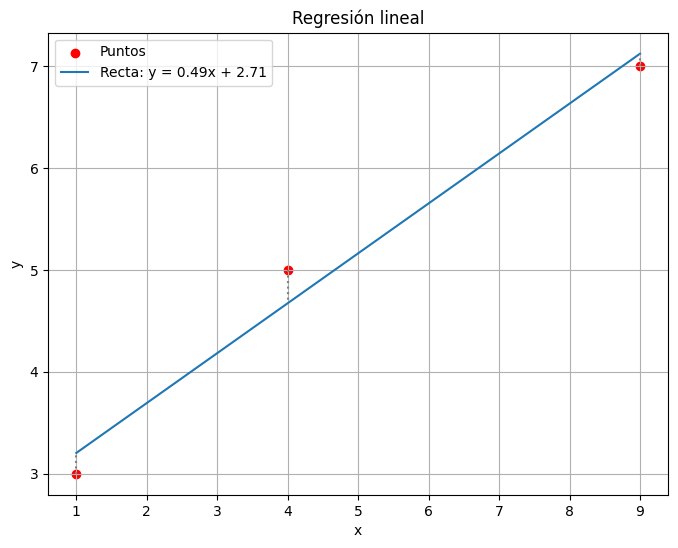

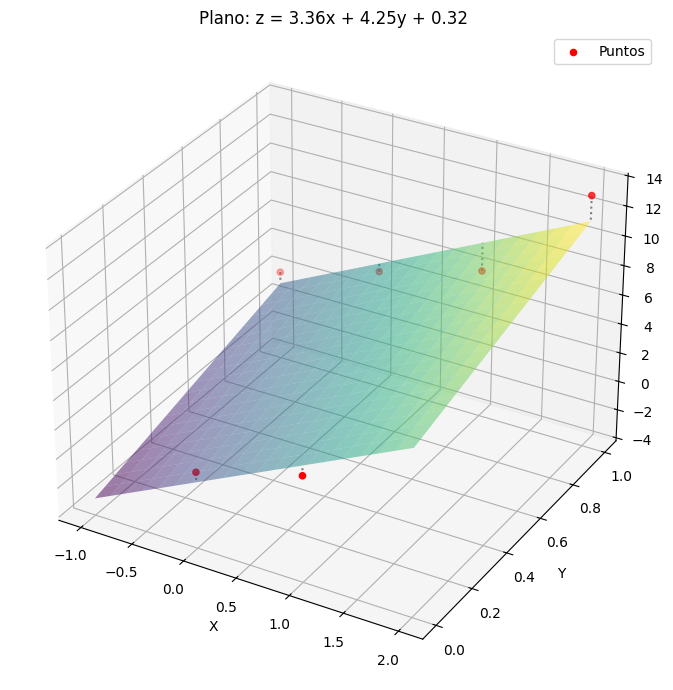

In [1]:
"""
Dado un set de datos (puntos en un plano) hay que hallar la recta que cumpla el menor error entre estos

Sabemos que la derivada del error respecto de a y b son las siguientes formulas

E(a,b) = Σ(axi + b - yi)**2

dE_da = Σ 2(axi + b - yi)*xi
      = 2 Σ (axi**2 + bxi - yixi)
      = 2(Σaxi**2 + Σbxi - Σyixi) 
      = Σaxi**2 + Σbxi - Σyi 
      = a Σxi**2 + b Σxi – Σyixi= 0
        
dE_db = Σ 2(axi + b - yi)*1
      = 2 Σ (axi + b - yi) 
      = Σaxi + Σb - Σyi 
      = Σaxi + b Σ1 - Σyi 
      = a*Σxi + b*n = Σyi
      
Obtengo las siguientes ecuaciones

Respecto de a: aΣxi**2 + b Σxi = Σxiyi
Respecto de b: a*Σxi + b*n = Σyi

|Σxi**2 Σxi| |a|   |Σxiyi|
|Σxi     n | |b| = | Σyi |

Resuelvo con determinantes:
a = nΣxiyi - Σxi*Σyi / nΣxi**2 - (Σxi)**2
b = Σxi**2*Σyi - Σxi*Σyi / nΣxi**2 - (Σxi)**2

Otra forma:

a = nΣxiyi - Σxi*Σyi / nΣxi**2 - (Σxi)**2
b = Σyi - aΣxi / n

Para un plano que pase por puntos la formula es
E(a,b,c) = Σ(axi + byi + c - zi)**2

"""
import numpy as np
import matplotlib.pyplot as plt

class Regression:

    def linear(self, matrix):
        n = matrix.shape[0]
        a = 0
        b = 0 
        sumXi = 0
        sumXi2 = 0
        sumYi = 0
        sumXiYi = 0
        
        
        for i in range(n):
            sumXi += matrix[i][0]
            sumYi += matrix[i][1]
            sumXi2 += matrix[i][0]**2
            sumXiYi += matrix[i][0] * matrix[i][1]
        
        div = n * sumXi2 - sumXi**2 #determinante del sistema
        
        a = (n*sumXiYi - sumXi*sumYi) / div # divido el determinante del sistema respecto de a con el del sistema Δx/Δ = x
        b = (sumYi - a * sumXi) / n # usar el a en esta operacion genera un propagacion de errores mayor que si no se usara
        
        return a, b
    
    
    
    def plane(self, matrix):
        """
        ACLARACION:
        Para encontrar las derivadas del error respecto de cada variable lo hice a mano usando la formula danda mas arriba, el loop 
        calcula las sumatorias necesarias
        
        dE_da = aΣxi**2 + bΣxiyi + cΣxi = Σzixi
        dE_db = aΣxiyi + bΣyi**2 + cΣyi = Σziyi
        dE_dc = aΣxi + bΣyi + c*n = Σzi
        
        
        En la matriz A se observa a que multiplicarian a, b y c. Y el vecb tiene los resultados donde estan los Zi
        """
        
        n = matrix.shape[0] # cantidad de puntos dados (long de columnas)
        
        sumXi = sumXi2 = sumYi = sumYi2 = sumXiYi = sumZi = sumZiYi = sumZiXi = 0
        
        # genero la sumatorias que se van a usar (alternativa es usar np.sum)
        for i in range(n):
            sumXi += matrix[i][0]
            sumYi += matrix[i][1]
            sumXi2 += matrix[i][0]**2
            sumYi2 += matrix[i][1]**2 
            sumXiYi += matrix[i][0] * matrix[i][1]
            sumZi += matrix[i][2]
            sumZiYi += matrix[i][2] * matrix[i][1]
            sumZiXi += matrix[i][2] * matrix[i][0]

        vecb = np.array([sumZiXi, sumZiYi, sumZi]) # vector resultado de el SEL ya derivado
        
        #formo el array que se formaria luego de tener el SEL ya derivado respecto de a, b y c
        A = np.array([[sumXi2, sumXiYi, sumXi],
                      [sumXiYi, sumYi2, sumYi],
                      [sumXi,    sumYi,     n]])
        
        return self.resolve_cramerRule(A, vecb) # retorno directamente esta fun que ya proporciona los resultados
    
    def resolve_cramerRule(self, matrix, vecb):
        soluciones = []
        D = self.determinante(matrix)
        
        for i in range(matrix.shape[0]): # itero por la cantidad de cols
            Ai = np.copy(matrix) # genero una copia en cada iteracion asi no se modifica la original (generar una fuera del loop tampoco funciona por lo mismo)
            Ai[:, i] = vecb # reemplazo la col actual por el vector b para hallar la determinante respecto de la variable que corresponde esa col
            Di = self.determinante(Ai) # asigno la determinante de esta iteracion que usa esta fun que calcula la determinante de cuanquier matriz nxn
            soluciones.append(Di / D) # asigno el resultado en un array de soluciones (para que este sea general y no se limite a solo 2 o 3 variables) formula de Δx/Δ = x
        
        return soluciones

        
    def determinante(self, A):
        if A.shape[0] == 2:
            return A[0][0] * A[1][1] - A[0][1] * A[1][0]
        
        det = 0
        
        """
        este for va sumando el determinante hallado de cada cofactor
        -1**i representa si va a ser positivo o negativo dependiendo de la col en que este
        A[0][i] es la columna acutal (en 0, (-1)**i * A[0][i] = 1, en 1 es -1 y asi va alternando)
        luego la llamo en si misma pero esta vez le paso una matriz n-1xn-1, borro la col 0 y producida se le borra la col i (parametros np.delete(matriz, pos, eje))
        esto va a continuar hasta llegar a una de 2x2 y luego regresa con todo los valores obtenidos y pasa de iteracion y nuevamente busca una 2x2
        posible optimizacion: agregar un if que contemple si es 3x3 y usar el metodo de Sarrus
        """
        for i in range(A.shape[1]):
            cofactor = (-1)**i * A[0][i] * self.determinante(np.delete(np.delete(A, 0, 0), i, 1))
            det += cofactor
            
        return det
    
    # Esta funcion solo se encarga de graficar, no me parecio necesario indagar mucho
    def graficar(self, puntos):
        puntos = np.array(puntos)

        if puntos.shape[1] == 2:  # Regresión lineal 2D
            xi = puntos[:, 0]
            yi = puntos[:, 1]

            a, b = self.linear(puntos)
            x_line = np.linspace(min(xi), max(xi), 100)
            y_line = a * x_line + b
            
            plt.figure(figsize=(8, 6))
            plt.scatter(xi, yi, color='red', label='Puntos')
            plt.plot(x_line, y_line, label=f'Recta: y = {a:.2f}x + {b:.2f}')
            # Línea desde cada punto hasta la recta
            for x, y in zip(xi, yi):
                y_estimado = a * x + b
                plt.plot([x, x], [y, y_estimado], color='grey', linestyle='dotted')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title('Regresión lineal')
            plt.legend()
            plt.grid(True)
            plt.show()

        elif puntos.shape[1] == 3:  # Regresión de plano 3D
            xi = puntos[:, 0]
            yi = puntos[:, 1]
            zi = puntos[:, 2]

            a, b, c = self.plane(puntos)

            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')

            # Crear malla
            x_range = np.linspace(min(xi), max(xi), 20)
            y_range = np.linspace(min(yi), max(yi), 20)
            X, Y = np.meshgrid(x_range, y_range)
            Z = a * X + b * Y + c

            
            # Superficie del plano
            ax.plot_surface(X, Y, Z, alpha=0.5, cmap='viridis', edgecolor='none')
            # Puntos
            ax.scatter(xi, yi, zi, color='red', label='Puntos')
            
            # Línea desde cada punto hasta el plano
            for x, y, z in zip(xi, yi, zi):
                z_estimado = a * x + b * y + c
                ax.plot([x, x], [y, y], [z, z_estimado], color='gray', linestyle='dotted')
            
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.set_title(f'Plano: z = {a:.2f}x + {b:.2f}y + {c:.2f}')
            plt.legend()
            plt.tight_layout()
            plt.show()



        
# puntos para la lineal
xy = np.array([[1,3],
               [4,5],
               [9,7]])

# puntos para el plano
xyz = np.array([[0,0, 1],
                [1,0, 3],
                [0,1, 4],
                [1,1, 6],
                [2,1,13],
                [-1,1,2]])

aNP, bNP = np.polyfit(xy[:, 0], xy[:, 1], 1) # a y b que otorga numpy con aproximacion y polinomio de grado uno

# separo los xyz para usarlos con la aproximacion que brinda numpy
Xnp = xyz[:, 0] 
Ynp = xyz[:, 1]
Znp = xyz[:, 2]

Anp = np.vstack([Xnp, Ynp, np.ones(len(Xnp))]).T # genero esta matrix con columnas de los x, los y, y completo la 3er col con unos (asi lo pide numpy)


regresion = Regression()

print("\n--- Regresión Lineal ---")
print(f"Valores hallados       : {regresion.linear(xy)}")
print(f"Valor a hallar (a, b)  : {aNP}, {bNP}")

print("\n--- Regresión de Plano ---")
print(f"Valores hallados       : {regresion.plane(xyz)}")
print(f"Valores esperados (np) : {np.linalg.lstsq(Anp, Znp, rcond=None)[0]}")


regresion.graficar(xy)
regresion.graficar(xyz)


In [ ]:
import numpy as np

def lu_factorization(A):
    """
    Realiza la factorización LU sin pivoteo parcial.
    Devuelve las matrices L y U tal que A = LU.
    """
    n = A.shape[0]
    L = np.eye(n)
    U = A.copy().astype(float)

    for k in range(n - 1):
        if np.isclose(U[k, k], 0):
            raise ValueError(f"Pivote nulo en la fila {k}. No se puede continuar sin pivoteo.")

        for i in range(k + 1, n):
            L[i, k] = U[i, k] / U[k, k]
            U[i, k:] -= L[i, k] * U[k, k:]

    return L, U

def forward_substitution(L, b):
    """
    Resuelve Ly = b con sustitución hacia adelante.
    """
    n = L.shape[0]
    y = np.zeros(n)

    for i in range(n):
        y[i] = b[i] - np.dot(L[i, :i], y[:i])

    return y

def backward_substitution(U, y):
    """
    Resuelve Ux = y con sustitución hacia atrás.
    """
    n = U.shape[0]
    x = np.zeros(n)

    for i in reversed(range(n)):
        if np.isclose(U[i, i], 0):
            raise ValueError(f"Pivote nulo en U[{i},{i}]. No se puede resolver el sistema.")
        x[i] = (y[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]

    return x

def solve_lu(A, b):
    """
    Resuelve el sistema Ax = b usando factorización LU sin pivoteo.
    """
    if A.shape[0] != A.shape[1]:
        raise ValueError("La matriz A debe ser cuadrada.")
    if b.shape[0] != A.shape[0]:
        raise ValueError("El vector b debe tener la misma cantidad de filas que A.")

    L, U = lu_factorization(A)
    y = forward_substitution(L, b)
    x = backward_substitution(U, y)
    return x, L, U

# ---- USO DEL CÓDIGO ----

# Matriz A y vector b dados
A = np.array([
    [1, 2, 0],
    [0, 2, 3],
    [1, 0, 1]
], dtype=float)

b = np.array([7, 0, -2], dtype=float)

try:
    x, L, U = solve_lu(A, b)
    print("Solución del sistema Ax = b:")
    print("x =", x)
    print("\nMatriz L:")
    print(L)
    print("\nMatriz U:")
    print(U)

except ValueError as e:
    print("Error:", e)
